# Decision Trees on Breast Cancer Dataset

## About Decision Trees
Decision Trees are one of the simplest yet most powerful classification algorithms. They work by repeatedly splitting the data based on feature values to build a tree that predicts the target class. I chose Decision Trees because they offer easy interpretability and can naturally handle both categorical and numerical features without requiring scaling.

For this project, I used the Breast Cancer Wisconsin dataset, which contains 30 features related to tumor measurements and two classes: malignant and benign.

---

# 📚 Step 1: Import Libraries and Load Data

In [34]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn functionality
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load Breast Cancer Dataset
data = load_breast_cancer()

# Create DataFrame for easier exploration
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display basic info
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Classes: {data.target_names}")


Features shape: (569, 30)
Target shape: (569,)
Classes: ['malignant' 'benign']


I started by loading the Breast Cancer dataset from Scikit-Learn's built-in datasets.  
The feature set contains 569 samples with 30 features each.

- **Features Shape:** (569, 30)
- **Target Shape:** (569,)
- **Classes:** ['malignant', 'benign']

# Step 2: Preprcessing

In [38]:
# Note: Decision Trees do NOT require feature scaling!
# So, we directly split the data.

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 455 samples
Test set size: 114 samples


Since Decision Trees are not sensitive to feature scaling, I directly split the data into training and testing sets using an 80-20 split, ensuring that the class distribution is preserved with stratification.

- **Training Set Size:** 455 samples
- **Test Set Size:** 114 samples

I also visualized the class distribution. The dataset is slightly imbalanced but manageable.

# 📊 Step 3: Data Visualization (Class Distribution)

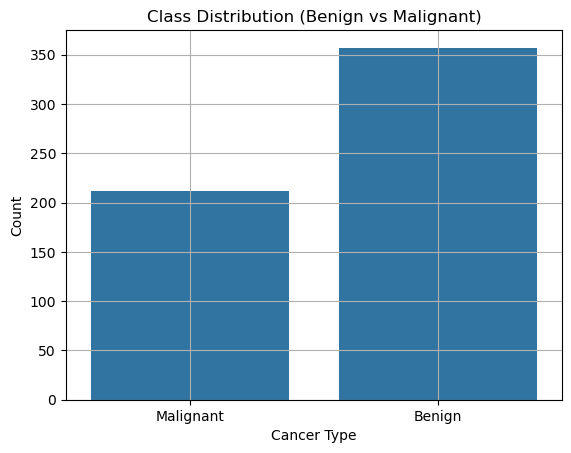

In [42]:
# Plot the distribution of classes
sns.countplot(x=y)
plt.title("Class Distribution (Benign vs Malignant)")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.grid(True)
plt.show()


# 🌳 Step 4: Build and Train Decision Tree Model

In [45]:
# Initialize Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# 📈 Step 5: Model Evaluation

Test Accuracy: 0.9123


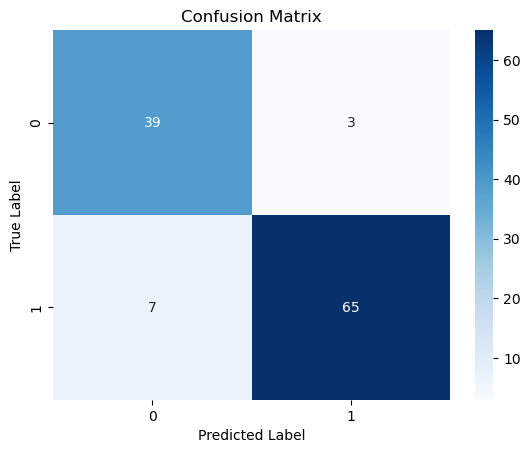

              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [48]:
# Predict
y_pred = tree.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=data.target_names))


Overall, the classifier performed better for benign cases, which makes sense because benign samples are the majority.

#  Step 6: Visualize the Decision Tree

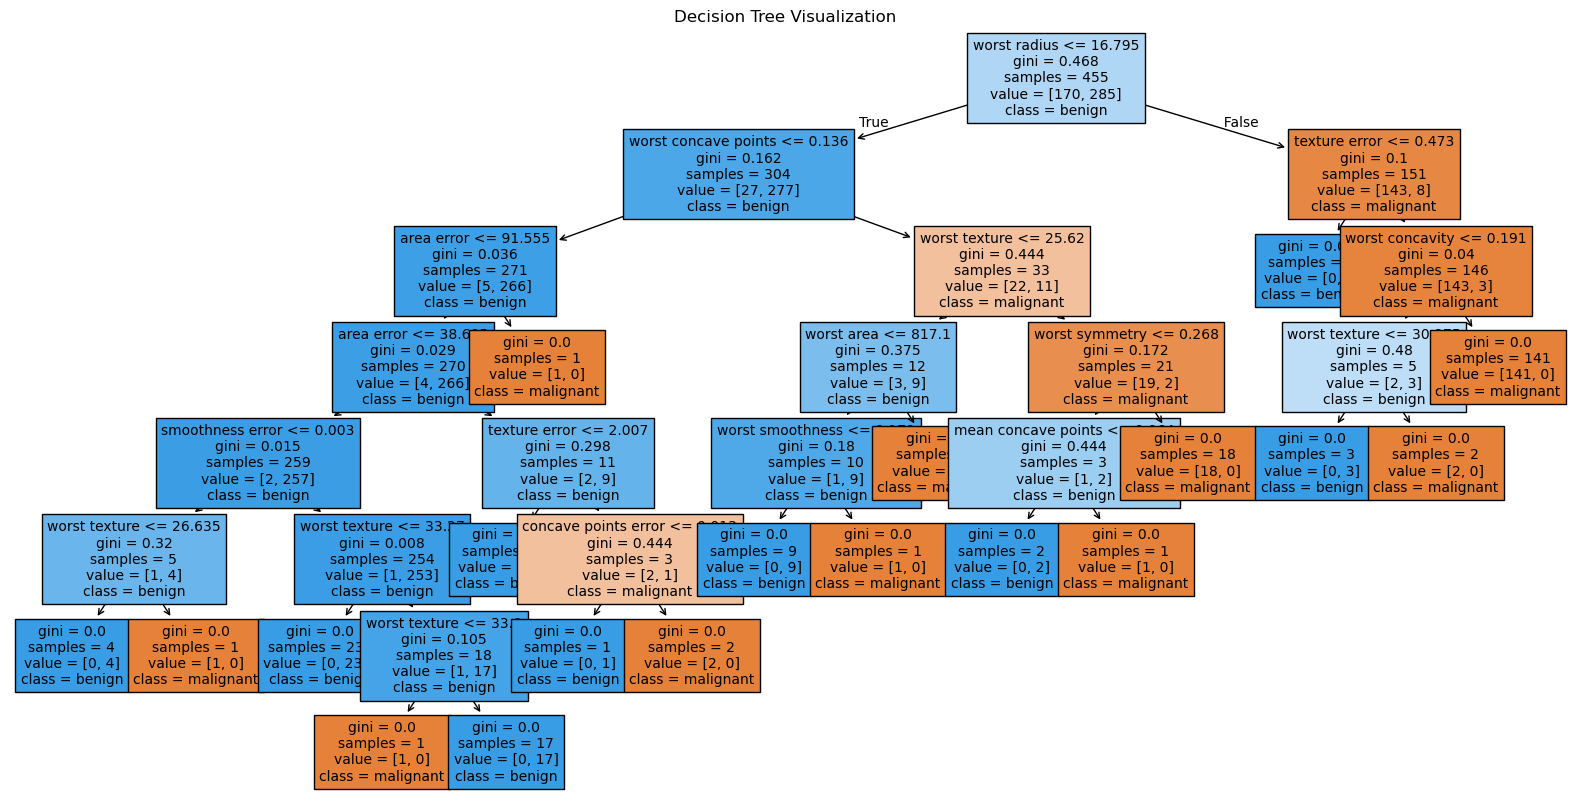

In [53]:
# Visualize the full tree (can be large)
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


I plotted the entire decision tree.  
While it was highly interpretable, it was very large and slightly overfit to the training data.

# Step 7: Hyperparameter Tuning

Test Accuracy (max_depth=4): 0.9386


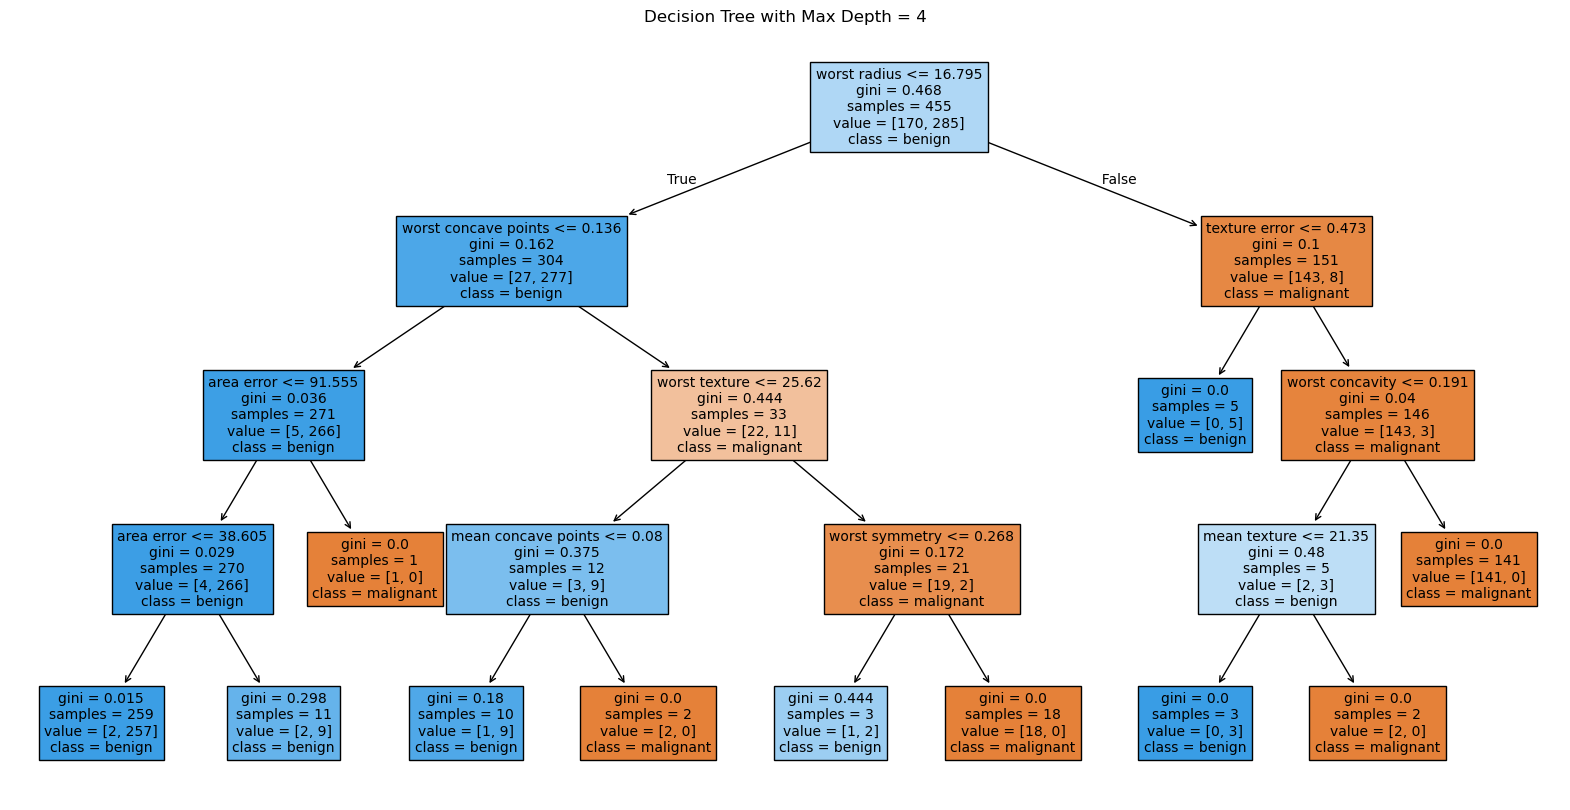

In [58]:
# Limit the maximum depth to prevent overfitting
tree_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_limited.fit(X_train, y_train)

# Predict again
y_pred_limited = tree_limited.predict(X_test)

# Accuracy
accuracy_limited = accuracy_score(y_test, y_pred_limited)
print(f"Test Accuracy (max_depth=4): {accuracy_limited:.4f}")

# Visualize limited tree
plt.figure(figsize=(20,10))
plot_tree(tree_limited, feature_names=data.feature_names, class_names=data.target_names, filled=True, fontsize=10)
plt.title("Decision Tree with Max Depth = 4")
plt.show()



To avoid overfitting, I trained a limited version of the Decision Tree with **max_depth=4**.  
This improved the model's generalization and produced a cleaner tree.

- **Test Accuracy after limiting depth:** 93.86%

The tree visualization with limited depth clearly shows fewer nodes and better splits.

# 📚 Step 8: Feature Importance Plot

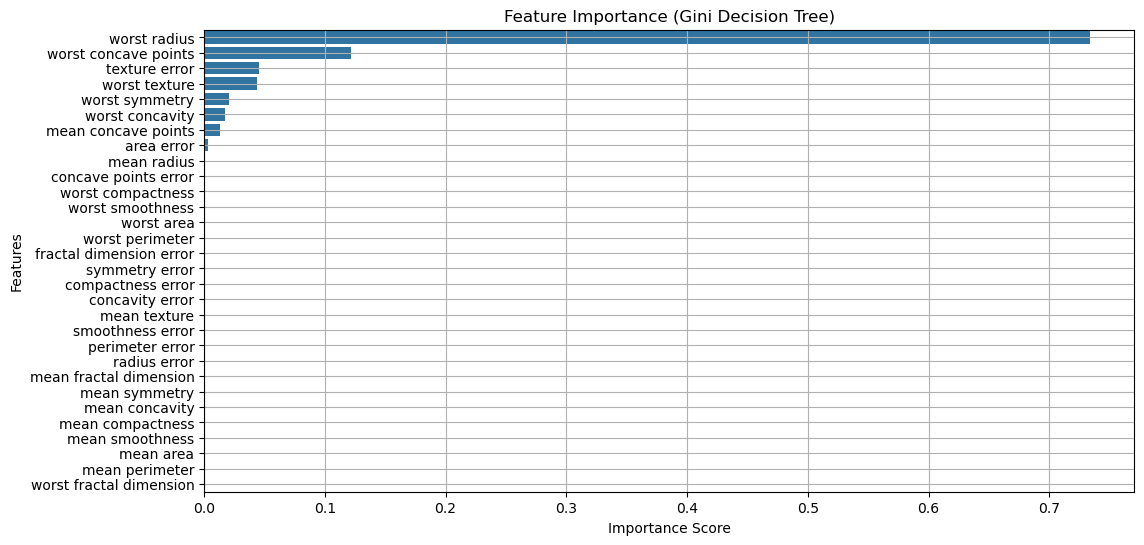

In [62]:


# Train a Decision Tree for Feature Importance (using Gini as an example)
feature_model = DecisionTreeClassifier(max_depth=4, random_state=1, criterion='gini')
feature_model.fit(X_train, y_train)

# Get feature importances
importances = feature_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (Gini Decision Tree)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True)
plt.show()


I extracted and plotted the feature importances assigned by the Decision Tree.  
The most important features for classification were:

- **Worst radius**
- **Worst concave points**
- **Texture error**

These features had the highest impact on predicting whether a tumor was malignant or benign.

# 📚 Step 9: Training vs Testing Accuracy Curve

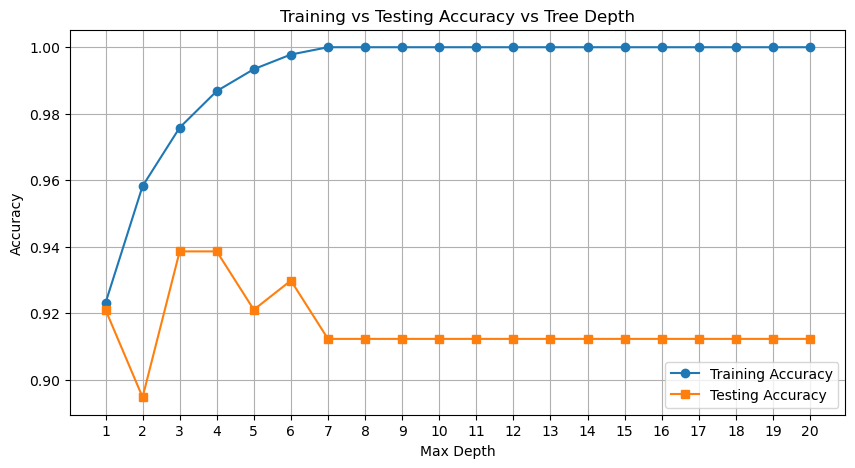

In [66]:


# Initialize lists to store accuracies
train_acc = []
test_acc = []

# Test different max_depth values
depths = range(1, 21)

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=1, criterion='gini')
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

# Plot Train vs Test Accuracy
plt.figure(figsize=(10,5))
plt.plot(depths, train_acc, marker='o', label='Training Accuracy')
plt.plot(depths, test_acc, marker='s', label='Testing Accuracy')
plt.title('Training vs Testing Accuracy vs Tree Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()


I evaluated how model performance changed with increasing tree depth.

- Training accuracy increased rapidly and reached 100%, indicating overfitting.
- Test accuracy peaked around depth=4, supporting the earlier choice to prune the tree.

This plot confirmed that controlling tree depth is essential to achieve a good bias-variance trade-off.

## Overall Conclusion
In this project, I successfully built and evaluated a Decision Tree Classifier on the Breast Cancer dataset.  
Here’s what I learned:

- Decision Trees work very well without scaling and provide interpretable models.
- Limiting tree depth is critical to prevent overfitting.
- Feature importance analysis provides valuable insights into what drives the predictions.

By visualizing the tree and analyzing feature importances, I gained a much deeper understanding of how Decision Trees operate in real-world classification tasks.